# import library

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# read and query of data

In [37]:
train= pd.read_csv('C:\\Users\\Souq al computer\\Desktop\\train.csv')
test= pd.read_csv('C:\\Users\\Souq al computer\\Desktop\\test.csv')

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [40]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [41]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# preprocessing

In [42]:
train['Age']= train['Age'].fillna(train['Age'].mean())
test['Age']= test['Age'].fillna(test['Age'].mean())

In [43]:
train['Sex']= train['Sex'].replace({'male':0, 'female':1})
test['Sex']= test['Sex'].replace({'male':0, 'female':1})

In [44]:
train.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis= 1, inplace= True)
test.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis= 1, inplace= True)
test.drop(test[test['PassengerId'] == 1044].index, inplace=True)

In [45]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.000000,1,0,7.2500
1,2,1,1,1,38.000000,1,0,71.2833
2,3,1,3,1,26.000000,0,0,7.9250
3,4,1,1,1,35.000000,1,0,53.1000
4,5,0,3,0,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000000,0,0,13.0000
887,888,1,1,1,19.000000,0,0,30.0000
888,889,0,3,1,29.699118,1,2,23.4500
889,890,1,1,0,26.000000,0,0,30.0000


In [46]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,0,34.50000,0,0,7.8292
1,893,3,1,47.00000,1,0,7.0000
2,894,2,0,62.00000,0,0,9.6875
3,895,3,0,27.00000,0,0,8.6625
4,896,3,1,22.00000,1,1,12.2875
...,...,...,...,...,...,...,...
413,1305,3,0,30.27259,0,0,8.0500
414,1306,1,1,39.00000,0,0,108.9000
415,1307,3,0,38.50000,0,0,7.2500
416,1308,3,0,30.27259,0,0,8.0500


# correlations

<AxesSubplot:xlabel='Survived', ylabel='count'>

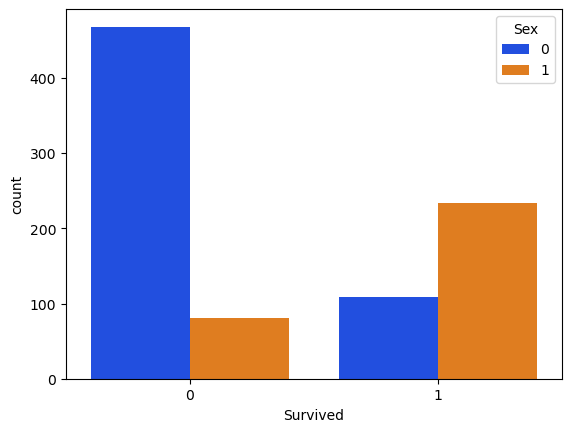

In [47]:
sns.countplot(x= 'Survived', data= train, hue= 'Sex', palette= 'bright')

<AxesSubplot:xlabel='Survived', ylabel='count'>

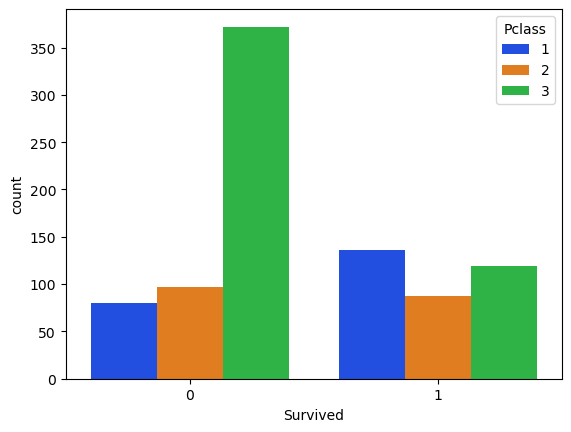

In [48]:
sns.countplot(x= 'Survived', data= train, hue= 'Pclass', palette= 'bright')

<AxesSubplot:xlabel='Survived', ylabel='count'>

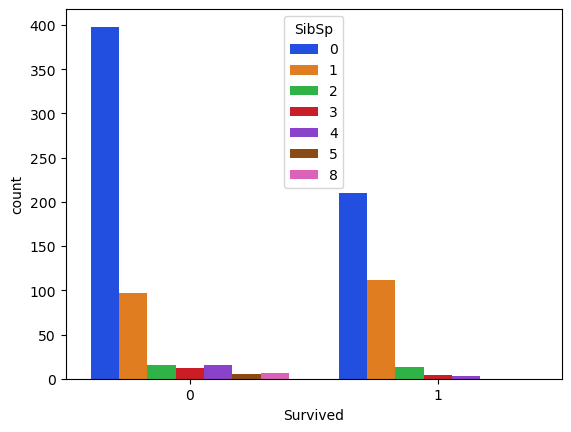

In [49]:
sns.countplot(x= 'Survived', data= train, hue= 'SibSp', palette= 'bright')

<AxesSubplot:xlabel='Survived', ylabel='count'>

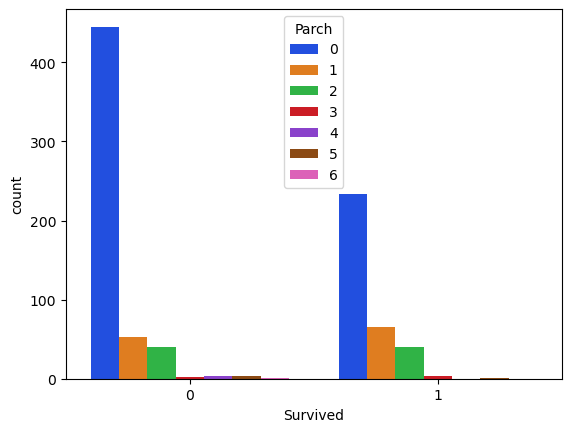

In [50]:
sns.countplot(x= 'Survived', data= train, hue= 'Parch', palette= 'bright')

# Build the model

In [51]:
x= train.drop(['Survived'], axis=1)
y= train['Survived']

In [52]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state= 42)

# Model 1 (LogisticRegression)

In [53]:
model1= LogisticRegression(random_state=42)
model1.fit(x_train, y_train)

C:\Users\Souq al computer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [54]:
test_pred1= model1.predict(x_test)
train_pred1= model1.predict(x_train)

In [55]:
print("test_pred : ", accuracy_score(y_test, test_pred1))
print("train_pred : ", accuracy_score(y_train, train_pred1))

test_pred :  0.7932960893854749
train_pred :  0.8019662921348315


In [56]:
confusion_matrix(y_test, test_pred1)

array([[90, 15],
       [22, 52]], dtype=int64)

# Model 2 (Support Vector Classifier)

In [57]:
model2= SVC(kernel='linear', random_state = 42)
model2.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

In [58]:
test_pred2= model1.predict(x_test)
train_pred2= model1.predict(x_train)

In [59]:
print("test_pred : ", accuracy_score(y_test, test_pred2))
print("train_pred : ", accuracy_score(y_train, train_pred2))

test_pred :  0.7932960893854749
train_pred :  0.8019662921348315


In [60]:
confusion_matrix(y_test, test_pred2)

array([[90, 15],
       [22, 52]], dtype=int64)

# Model 3 (DecisionTree)

In [61]:
model3= DecisionTreeClassifier(criterion= 'entropy', max_depth= 5, random_state= 0)
model3.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [62]:
test_pred3= model3.predict(x_test)
train_pred3= model3.predict(x_train)

In [63]:
print("test_pred : ", accuracy_score(y_test, test_pred3))
print("train_pred : ", accuracy_score(y_train, train_pred3))

test_pred :  0.7597765363128491
train_pred :  0.848314606741573


In [64]:
confusion_matrix(y_test, test_pred3)

array([[97,  8],
       [35, 39]], dtype=int64)

# Model 4 (RandomForest)

In [65]:
model4= RandomForestClassifier(n_estimators= 15, criterion= 'gini', max_depth= 17, random_state= 0)
model4.fit(x_train, y_train)

RandomForestClassifier(max_depth=17, n_estimators=15, random_state=0)

In [66]:
test_pred4= model3.predict(x_test)
train_pred4= model3.predict(x_train)

In [67]:
print("test_pred : ", accuracy_score(y_test, test_pred4))
print("train_pred : ", accuracy_score(y_train, train_pred4))

test_pred :  0.7597765363128491
train_pred :  0.848314606741573


In [68]:
confusion_matrix(y_test, test_pred4)

array([[97,  8],
       [35, 39]], dtype=int64)

# Save Predection

In [69]:
the_predection= model1.predict(test)

In [70]:
the_passenger= test.PassengerId

In [71]:
submission= pd.DataFrame({'the_passenger : ' : the_passenger, 'the_survived : ' : the_predection})

In [72]:
submission.to_csv('submission.csv', index= False)